In [1]:
"""Preprocesses data for training.

Preferrably, run using Jupyter Notebook.
"""
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read raw data from the excel file.
raw_data = pd.read_excel(
    "data/ouse93-96-raw-data.xlsx",
    index_col=0,
    header=1,
    usecols='A:I'
)

In [3]:
# Convert columns to float values. Turn non-numeric values into np.nan.
for column in raw_data.columns[1:]:
    raw_data[column] = pd.to_numeric(raw_data[column], errors='coerce')

In [4]:
# Convert negative values into np.nan.
raw_data = raw_data.mask(raw_data < 0, np.nan)

In [5]:
# Print all rows with NAN values.
raw_data[raw_data.isna().any(axis=1)]

,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme
1993-02-13,NaN,5.476,11.051,30.73,0.0,0.0,0.0,0.0
1993-03-15,NaN,2.546,7.179,18.06,11.2,0.0,86.0,19.2
1993-03-16,NaN,2.494,7.232,17.16,0.8,0.0,12.8,8.0
1993-04-07,22.90,4.159,26.603,NaN,2.4,0.0,0.0,3.2
1993-04-27,24.40,11.684,22.181,73.96,NaN,0.0,0.0,0.0
1995-03-01,80.60,19.096,100.761,174.00,17.6,NaN,51.2,21.6
1996-02-09,12.70,NaN,7.576,20.58,0.0,37.6,12.0,14.4
1996-04-18,7.61,NaN,13.918,16.84,0.8,4.8,47.2,32.0


In [6]:
# Calculate mean and standard deviation for each numeric column.
standard_deviations = raw_data.std()
means = raw_data.mean()
means

Crakehill         19.610816
Skip Bridge        7.619158
Westwick          21.597040
Skelton           47.093886
Arkengarthdale     9.209315
East Cowton       11.466301
Malham Tarn       68.896920
Snaizeholme        9.725394
dtype: float64

In [7]:
standard_deviations

Crakehill           25.280579
Skip Bridge         10.013513
Westwick            28.355790
Skelton             55.712853
Arkengarthdale     131.372744
East Cowton        235.722765
Malham Tarn       2092.760651
Snaizeholme         20.984849
dtype: float64

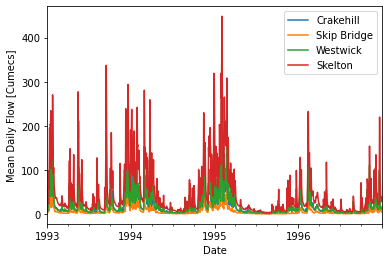

In [8]:
# Plot river flow columns.
raw_data[['Crakehill', 'Skip Bridge', 'Westwick', 'Skelton']].plot(xlabel="Date", ylabel="Mean Daily Flow [Cumecs]")
plt.savefig('figures/river-flow.png') 

In [9]:
# Find the values that lies the furthest from the mean from Mean Daily Flow columns.
skelton_max = raw_data['Skelton'].max()
print(raw_data['Skelton'].sort_values(ascending=False).head())
print((skelton_max - means['Skelton']) / standard_deviations['Skelton'])


1995-02-01    448.1
1995-02-02    362.3
1993-09-15    337.2
1995-01-29    319.6
1994-12-29    319.1
Name: Skelton, dtype: float64
7.197730720717447


1995-02-11    5000.0
Name: Arkengarthdale, dtype: float64
1995-02-28    9000.0
Name: East Cowton, dtype: float64
1996-01-10    80000.0
Name: Malham Tarn, dtype: float64


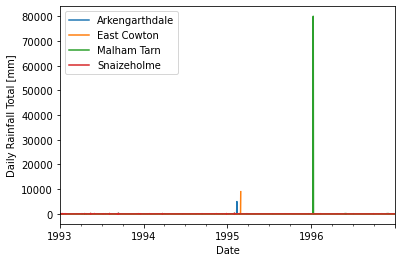

In [10]:
# Plot river flow columns.
raw_data[['Arkengarthdale', 'East Cowton', 'Malham Tarn', 'Snaizeholme']].plot(xlabel="Date", ylabel="Daily Rainfall Total [mm]")
plt.savefig('figures/rainfall.png')

print(raw_data['Arkengarthdale'].sort_values(ascending=False).head(1))
print(raw_data['East Cowton'].sort_values(ascending=False).head(1))
print(raw_data['Malham Tarn'].sort_values(ascending=False).head(1))

In [11]:
# Interpolate outliers.
for column in raw_data[['Arkengarthdale', 'East Cowton', 'Malham Tarn']].columns:
    column_values = raw_data[column]
    column_max_id = column_values.idxmax()
    column_values.loc[column_max_id] = np.nan

    """
    column_values = column_values.mask(
        column_values > means[column] + 3 * standard_deviations[column],
        np.nan
    )
    
    # If this is a river flow column, check the lower bound as well.
    if column in ['Crakehill', 'Skip Bridge', 'Westwick', 'Skelton']:
        column_values = column_values.mask(
            column_values < means[column] - 3 * standard_deviations[column],
            np.nan
        )
    raw_data[column] = column_values.interpolate(method="linear") 
    """

In [12]:
# Imputate spurious data.
raw_data = raw_data.interpolate(method="linear")

In [13]:
# Print all rows with NAN values.
raw_data[raw_data.isna().any(axis=1)]

,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme


In [14]:
# Print values interpolated for outliers.
print(raw_data.loc["1995-02-11", "Arkengarthdale"])
print(raw_data.loc["1995-02-28", "East Cowton"])
print(raw_data.loc["1996-01-10", "Malham Tarn"])


15.6
0.0
4.4


In [15]:
# Print all rows with NAN values.
raw_data[raw_data.isna().any(axis=1)]

,Crakehill,Skip Bridge,Westwick,Skelton,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme


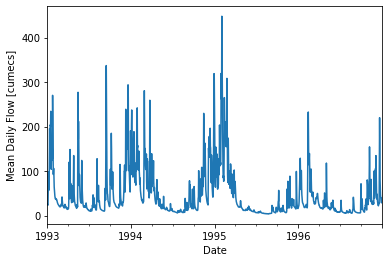

In [16]:
# Plot the Skelton data
raw_data['Skelton'].plot(kind='line', xlabel="Date", ylabel="Mean Daily Flow [cumecs]")
plt.savefig('figures/skelton-data.png')

In [17]:
# Add a column for Mean Daily Flow in Skelton one day before. 
raw_data.insert(0, 'Skelton T-1', raw_data['Skelton'])

In [18]:
# Make predictand column the rightmost column.
columns = raw_data.columns
skelton_column = raw_data.pop("Skelton")
raw_data.insert(len(columns) - 1, skelton_column.name, skelton_column)

In [19]:
# Explore moving average

#weights = np.array([0.5, 0.25, 0.25])
#sum_weights = np.sum(weights)

raw_data.insert(0, "Arkengarthdale MA", raw_data['Arkengarthdale'].rolling(3).mean())
raw_data.insert(0, "East Cowton MA", raw_data['East Cowton'].rolling(3).mean())
raw_data.insert(0, "Malham Tarn MA", raw_data['Malham Tarn'].rolling(3).mean())
raw_data.insert(0, "Snaizeholme MA", raw_data['Snaizeholme'].rolling(3).mean())
raw_data["Snaizeholme MA"]["1993-01-01"]

nan

In [20]:
# Explore the correlations between potential predictors and the predictand.

print(raw_data.corr()["Skelton"].sort_values(ascending=False))
# Lag Mean Daily Flow potential predictor columns by one day.
raw_data['Skelton T-1'] = raw_data['Skelton T-1'].shift(periods=1, freq="D")
raw_data['Crakehill'] = raw_data['Crakehill'].shift(periods=1, freq="D")
raw_data['Skip Bridge'] = raw_data['Skip Bridge'].shift(periods=1, freq="D")
raw_data['Westwick'] = raw_data['Westwick'].shift(periods=1, freq="D")

# Lag Rainfall columns by one day.
raw_data['Arkengarthdale MA'] = raw_data['Arkengarthdale MA'].shift(periods=1, freq="D")
raw_data['East Cowton MA'] = raw_data['East Cowton MA'].shift(periods=1, freq="D")
raw_data['Malham Tarn MA'] = raw_data['Malham Tarn MA'].shift(periods=1, freq="D")
raw_data['Snaizeholme MA'] = raw_data['Snaizeholme MA'].shift(periods=1, freq="D")
raw_data['Arkengarthdale'] = raw_data['Arkengarthdale'].shift(periods=1, freq="D")
raw_data['East Cowton'] = raw_data['East Cowton'].shift(periods=1, freq="D")
raw_data['Malham Tarn'] = raw_data['Malham Tarn'].shift(periods=1, freq="D")
raw_data['Snaizeholme'] = raw_data['Snaizeholme'].shift(periods=1, freq="D")

correlations = raw_data.corr()
correlations["Skelton"].sort_values(ascending=False)

Skelton T-1          1.000000
Skelton              1.000000
Crakehill            0.972963
Skip Bridge          0.947450
Westwick             0.886928
Snaizeholme MA       0.668919
Arkengarthdale MA    0.587650
Malham Tarn MA       0.568044
East Cowton MA       0.396614
Snaizeholme          0.345434
Arkengarthdale       0.297903
Malham Tarn          0.293830
East Cowton          0.181339
Name: Skelton, dtype: float64


Skelton              1.000000
Westwick             0.912792
Skelton T-1          0.889158
Crakehill            0.885093
Skip Bridge          0.884202
Snaizeholme MA       0.689903
Arkengarthdale MA    0.594483
Malham Tarn MA       0.586907
Snaizeholme          0.584831
Arkengarthdale       0.507064
Malham Tarn          0.495231
East Cowton MA       0.402025
East Cowton          0.338331
Name: Skelton, dtype: float64

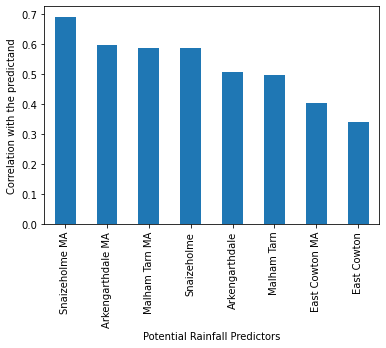

In [21]:
# Plot correlations
correlations_to_plot = correlations.drop(index=["Skelton", "Skelton T-1", "Crakehill", "Skip Bridge", "Westwick"])["Skelton"].sort_values(ascending=False).plot(xlabel="Potential Rainfall Predictors", ylabel="Correlation with the predictand", kind="bar")
plt.savefig('figures/rainfall-correlations.png') 

In [22]:
# Drop rows containing missing values after lagging.
raw_data = raw_data.dropna()
raw_data

,Snaizeholme MA,Malham Tarn MA,East Cowton MA,Arkengarthdale MA,Skelton T-1,Crakehill,Skip Bridge,Westwick,Arkengarthdale,East Cowton,Malham Tarn,Snaizeholme,Skelton
1993-01-04,1.333333,0.533333,0.000000,0.000000,23.60,9.46,4.124,8.057,0.0,0.0,0.8,0.0,23.47
1993-01-05,20.533333,0.800000,8.266667,0.800000,23.47,9.41,4.363,7.925,2.4,24.8,0.8,61.6,60.70
1993-01-06,57.600000,11.733333,10.133333,4.533333,60.70,26.30,11.962,58.704,11.2,5.6,33.6,111.2,98.01
1993-01-07,57.866667,12.000000,10.133333,4.533333,98.01,32.10,10.237,34.416,0.0,0.0,1.6,0.8,56.99
1993-01-08,49.333333,17.600000,3.200000,5.600000,56.99,19.30,7.254,22.263,5.6,4.0,17.6,36.0,56.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-12-27,0.533333,0.266667,1.333333,0.000000,33.06,11.70,6.075,12.671,0.0,0.8,0.0,0.0,29.52
1996-12-28,1.600000,3.200000,6.133333,0.533333,29.52,10.90,5.721,11.558,1.6,14.4,8.8,3.2,28.67
1996-12-29,2.666667,4.533333,8.800000,4.266667,28.67,11.10,5.486,11.411,11.2,11.2,4.8,4.8,29.31
1996-12-30,2.933333,4.533333,10.133333,5.333333,29.31,12.10,5.329,11.781,3.2,4.8,0.0,0.8,34.28


In [23]:
# Drop non-moving-average rainfall columns.
raw_data = raw_data.drop(columns=['Arkengarthdale', 'East Cowton', 'Malham Tarn', 'Snaizeholme'])

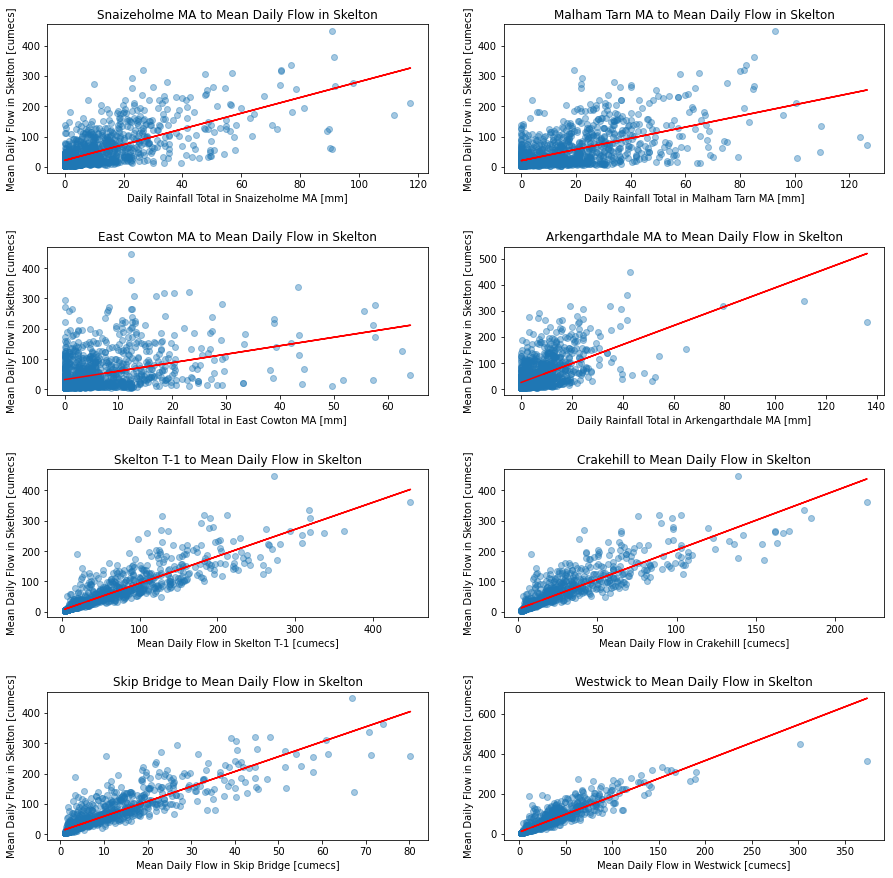

In [24]:
# Plot correlation between lagged predictors and the predictand.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

plt.subplots_adjust(wspace=0.2, hspace=0.5)

mean_daily_flow_columns = ["Skelton T-1", "Crakehill", "Skip Bridge", "Westwick"]
daily_rainfall_total_columns = ["Arkengarthdale MA", "East Cowton MA", "Malham Tarn MA", "Snaizeholme MA"]


for i in range(len(raw_data.loc[:, raw_data.columns != "Skelton"].columns)):
    column_name = raw_data.iloc[:, i].name
    x = raw_data.iloc[:, i].values.reshape(-1, 1)
    y = raw_data['Skelton'].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(x, y)
    y_pred = linear_regressor.predict(x)
    axes[i // 2][i % 2].scatter(x, y, alpha=0.4)
    axes[i // 2][i % 2].plot(x, y_pred, color='red')
    # Decide on x-label.
    if column_name in mean_daily_flow_columns:
        axes[i // 2][ i % 2].set_xlabel(f"Mean Daily Flow in {column_name} [cumecs]")
    elif column_name in daily_rainfall_total_columns:
        axes[i // 2][ i % 2].set_xlabel(f"Daily Rainfall Total in {column_name} [mm]")
    axes[i // 2][ i % 2].set_ylabel('Mean Daily Flow in Skelton [cumecs]')
    axes[i // 2][ i % 2].set_title(f"{column_name} to Mean Daily Flow in Skelton")

plt.savefig('figures/predictors-predictand.png')
    


In [25]:
# Split the data into into training-validation and test sets.
train_and_validation, test = train_test_split(raw_data, test_size=0.2, random_state=5)

# Calculate min and max values from training-validation set.
max_values = train_and_validation.max(axis=0)
min_values = train_and_validation.min(axis=0)
print(max_values)
print(min_values)

# Split training-validation set into training and validation sets.
train, validation = train_test_split(train_and_validation, test_size=0.25, random_state=6)
validation['Skelton'].head()

Snaizeholme MA       111.866667
Malham Tarn MA       126.533333
East Cowton MA        64.266667
Arkengarthdale MA    136.133333
Skelton T-1          362.300000
Crakehill            185.000000
Skip Bridge           80.244000
Westwick             301.598000
Skelton              448.100000
dtype: float64
Snaizeholme MA       0.000
Malham Tarn MA       0.000
East Cowton MA       0.000
Arkengarthdale MA    0.000
Skelton T-1          3.694
Crakehill            2.080
Skip Bridge          1.004
Westwick             1.954
Skelton              3.694
dtype: float64


1994-09-22     26.100
1995-01-20    108.300
1995-08-04      4.433
1996-02-28     50.420
1994-01-19    118.300
Name: Skelton, dtype: float64

In [26]:
def standardise(x: pd.Series, max_value: float, min_value: float):
    """Standardises data using minimum and maximum values.
    
    Args:
    x: A pandas.Series instance.
    max_value: A maximum value for the standardisation formula.
    min_value: A minimum value for the standardisation formula.
    
    Returns:
    pandas.Series.
    """
    return 0.8 * ((x - min_value) / (max_value - min_value)) + 0.1
    
# Standardise the data.
standardised_data_sets = []
for data_set in [train, validation, test]:
    standardised_columns = []
    for column in data_set.columns:
        standardised_column = data_set.loc[:, column].apply(standardise, args=(max_values[column], min_values[column]))
        standardised_columns.append(standardised_column)
    standardised_data_set = pd.concat(standardised_columns, axis=1)
    standardised_data_sets.append(standardised_data_set)
        
train_standardised = standardised_data_sets[0]
validation_standardised = standardised_data_sets[1]
test_standardised = standardised_data_sets[2]
train_standardised

,Snaizeholme MA,Malham Tarn MA,East Cowton MA,Arkengarthdale MA,Skelton T-1,Crakehill,Skip Bridge,Westwick,Skelton
1994-06-03,0.128605,0.148894,0.163071,0.110970,0.121831,0.116925,0.117405,0.109382,0.118678
1993-04-24,0.225864,0.191043,0.182988,0.121939,0.159734,0.146447,0.130843,0.133106,0.159758
1994-08-07,0.109535,0.111802,0.209544,0.134476,0.117682,0.109228,0.107461,0.107764,0.110985
1994-05-01,0.155304,0.103372,0.100000,0.107835,0.168322,0.149945,0.125967,0.132489,0.142350
1994-06-22,0.256377,0.371444,0.133195,0.121939,0.123415,0.113733,0.111964,0.123481,0.141756
...,...,...,...,...,...,...,...,...,...
1993-08-11,0.223957,0.244995,0.299170,0.157982,0.183738,0.161754,0.127966,0.135063,0.165608
1994-08-14,0.100000,0.103372,0.129876,0.109403,0.108152,0.104461,0.106098,0.103618,0.105788
1995-09-24,0.140048,0.118546,0.100000,0.106268,0.105234,0.103717,0.102696,0.101970,0.104662
1995-04-15,0.100000,0.100000,0.100000,0.100000,0.135417,0.128428,0.124664,0.115578,0.128237


In [27]:
def destandardise(x: pd.Series, max_value: float, min_value: float):
    """Destandardises data using minimum and maximum values.
    
    Args:
    x: A pandas.Series instance of standardised data.
    max_value: A maximum value for the destandardisation formula.
    min_value: A minimum value for the destandardisation formula.
    
    Returns:
    pandas.Series.
    """
    return ((x - 0.1) * (max_value - min_value)) / 0.8 + min_value

In [28]:
destandardised_data_sets = []
for data_set in standardised_data_sets:
    destandardised_columns = []
    for column in data_set.columns:
        destandardised_column = data_set.loc[:, column].apply(destandardise, args=(max_values[column], min_values[column]))
        destandardised_columns.append(destandardised_column)
    destandardised_data_set = pd.concat(destandardised_columns, axis=1)
    destandardised_data_sets.append(destandardised_data_set)
#destandardised_data_sets[0]
destandardised_data_sets[0].compare(train)
print(train.dtypes)
print(destandardised_data_sets[0].dtypes)
#train.to_csv("hello.csv")

Snaizeholme MA       float64
Malham Tarn MA       float64
East Cowton MA       float64
Arkengarthdale MA    float64
Skelton T-1          float64
Crakehill            float64
Skip Bridge          float64
Westwick             float64
Skelton              float64
dtype: object
Snaizeholme MA       float64
Malham Tarn MA       float64
East Cowton MA       float64
Arkengarthdale MA    float64
Skelton T-1          float64
Crakehill            float64
Skip Bridge          float64
Westwick             float64
Skelton              float64
dtype: object


In [29]:
# Save min and max values
skelton_min_value = min_values['Skelton']
skelton_max_value = max_values['Skelton']


min_max_values = {
    "min": skelton_min_value,
    "max": skelton_max_value
}

with open("standardisation.json", "w") as f:
    json.dump(min_max_values, f)

In [30]:
train_standardised.to_csv("data/training-set.csv")
validation_standardised.to_csv("data/validation-set.csv")
test_standardised.to_csv("data/test-set.csv")